In [1]:
# Suomen pakkausjätteen määrä per henkilö visualisoituna vuosilta 2014-2023, poislukien koronavuodet 2019-2021. Vuodet poistetty, koska
# pakkausjätteen määrä nousi silloin jyrkästi. Ennustus vuosille 2024-2026.

import pandas as pd

In [2]:
plasticdata = pd.read_csv("data/plastic.csv")

# tehdään kopio jotta ei tehdä muutoksia alkuperäiseen
plastic_copy = plasticdata.copy()

plastic_copy = plastic_copy.rename(columns= {
    "geo": "Country",
    "unit" : "Unit",
    "TIME_PERIOD" : "Year",
    "OBS_VALUE" : "Waste kg per person",
    "waste" : "Waste category",
    "wst_oper" : "Operation"
})

plastic_copy

,DATAFLOW,LAST UPDATE,freq,Waste category,Operation,Unit,Country,Year,Waste kg per person,OBS_FLAG,CONF_STATUS
0,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Austria,2014,152.52,NaN,NaN
1,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Austria,2015,151.72,NaN,NaN
2,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Austria,2016,153.46,NaN,NaN
3,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Austria,2017,156.52,NaN,NaN
4,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Austria,2018,159.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Slovakia,2019,104.77,NaN,NaN
299,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Slovakia,2020,103.67,d,NaN
300,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Slovakia,2021,105.40,d,NaN
301,ESTAT:ENV_WASPAC(1.0),21/10/25 23:00:00,Annual,Packaging,Waste generated,Kilograms per capita,Slovakia,2022,108.38,d,NaN


In [3]:
# clean and prepare the data
finland = plastic_copy[plastic_copy["Country"] == "Finland"]
finland = finland[["Year", "Waste kg per person"]].dropna()
finland_not_corona = finland[(finland["Year"] < 2020) | (finland["Year"] > 2021)]

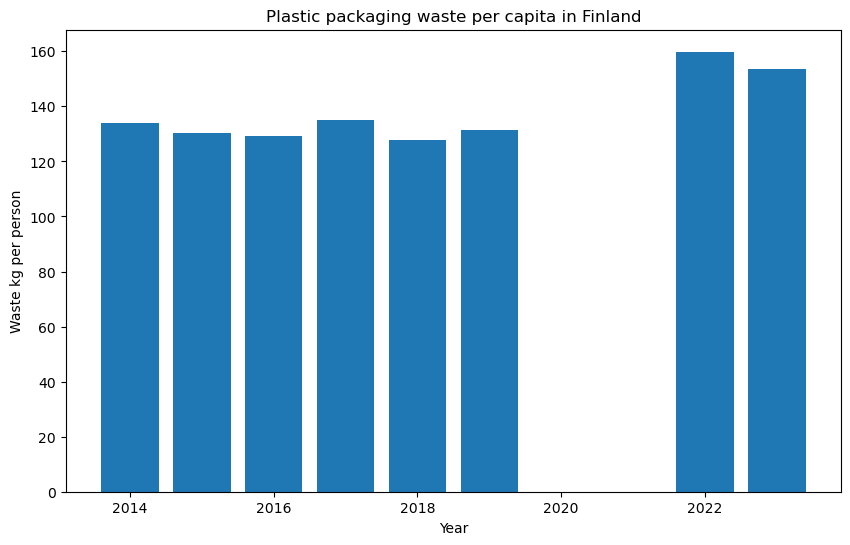

In [4]:
# Visualize the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(finland_not_corona["Year"], finland_not_corona["Waste kg per person"])
plt.title("Plastic packaging waste per capita in Finland")
plt.xlabel("Year")
plt.ylabel("Waste kg per person")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# reshape(turns the 1D array into a 2D array)
x = finland_not_corona["Year"].values.reshape(-1,1)
y = finland_not_corona["Waste kg per person"].values

model = LinearRegression()
model.fit(x, y)

# you are training your model.
# You’re telling it:

# “Here are the input values (x), and here are the correct answers (y). Learn the relationship between them.”

# So the model looks for a pattern that best connects your inputs (x) to outputs (y).
# In linear regression, that means it tries to find the best-fitting line:

# y=a*x+b
# y=a*x+b
# where a (slope) and b (intercept) are what the model learns during .fit().

# So when you call model.fit(x, y), the model learns:
# “Given a year, what’s the typical plastic waste per person?”

# predict for next few years
# uses the learned line or curve to estimate what the target value 
# (in your case, waste per person) would be for those future years (2024–2026).
future_years = np.array([2024, 2025, 2026]).reshape(-1,1)

# This is the machine learning model making predictions.
predictions = model.predict(future_years)

#.flatten()
# This turns your 2D array back into 1D
for year, pred in zip(future_years.flatten(), predictions):
    print(f"Predicted waste in {year}: {pred:.2f} kg per person")

Predicted waste in 2024: 155.81 kg per person
Predicted waste in 2025: 158.83 kg per person
Predicted waste in 2026: 161.86 kg per person
